# ■ 신경망

 - 저자가 만들어온 가중치를 셋팅해서 필기체 데이터를 인식하는 3층 신경망을 생성

 - 신경망안에 들어가는 함수들 소개

	    1. 활성화 함수
	  	 - 계단 함수
	  	 - 시그모이드 함수
		   - 렐루(RELU) 함수
	    2. 출력층 함수
		   - 항등함수(회귀분석)
	  	 - 소프트맥스(Softmax) 함수 (분류)
    	 3. 오차 함수

전부 파이썬 날코딩으로 다 일일이 신경망을 만들고서 나중에 tensorflow 와 pytoch 를 사용해서 신경망을 구현한다.

# ■ 계단함수

 " 숫자 0과 1을 리턴하는 함수 "

    입력값 x <= 0 -----> 0 을 리턴
    입력값 x > 0 -----> 1을 리턴

## 예제1.

In [34]:
def step_func(x):
    if x > 0:
        return 1
    else:
        return 0

x_data = np.array([-1, 0, 1])    # 신경망의 데이터인 numpy array 형태로 구성
print( step_func(0.3) )   # 1. 에러가 나지 않는다.
print('\n')
print( step_func(x_data) )  # 에러 발생

1




ValueError: ignored

위에서 만든 step_func 은 넘파이 배열을 넣을 수 없습니다.

## 예제2. numpy 배열을 넣을 수 있도록 step_func 함수를 다시 생성합니다.

In [41]:
def step_func(x):
    y = x > 0                 # True 또는 False 출력
    return y.astype(np.int)   # bool type 을 숫자로 변환 True = 1, False = 0

print( step_func(np.array(-3.0)) )   
print( step_func(np.array(3.0)) )    

x_data = np.array([-1, 0, 1])
print( step_func(x_data) )     

0
1
[0 0 1]


설명: 신경망에서 흘러가는 모든 데이터는 numpy array 형태의 다차원 데이터 이므로 신경망내에서 쓰여질 활성화 함수도 numpy array 형태의 데이터를 받아서 처리할 수 있도록 생성되어져야 합니다.

## 문제34. 위에서 만든 step_func 을 이용해서 아래의 그림처럼 시각화 하시오

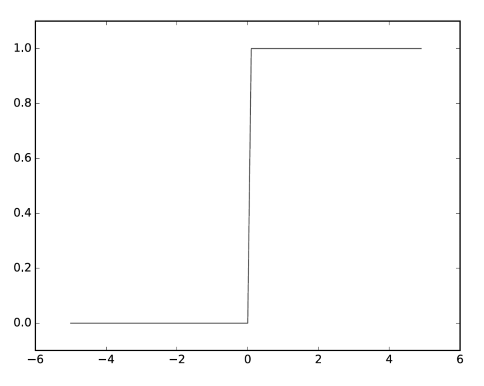


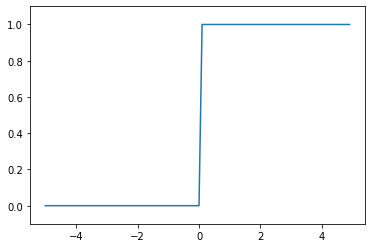

In [42]:
import matplotlib.pyplot as plt
import numpy as np

def step_func(x):
    y = x > 0
    return y.astype(np.int)

x = np.arange(-5, 5, 0.1)   # -5 부터 5 까지 0.1 간격으로 숫자 출력
y = step_func(x)

plt.plot(x,y)
plt.ylim(-0.1, 1.1)
plt.show()

# ■ 시그모이드 함수

## 문제35. 시그모이드 함수를 파이썬으로 구현하시오!  

$$ y = \frac{1}{1+e^{-x}} $$

In [43]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x) )

x_data = np.array([-0.5, 1.0, 2.0])
print(sigmoid(x_data)) 

[0.37754067 0.73105858 0.88079708]


## 문제36. 시그모이드 함수 그래프를 파이썬으로 그리시오


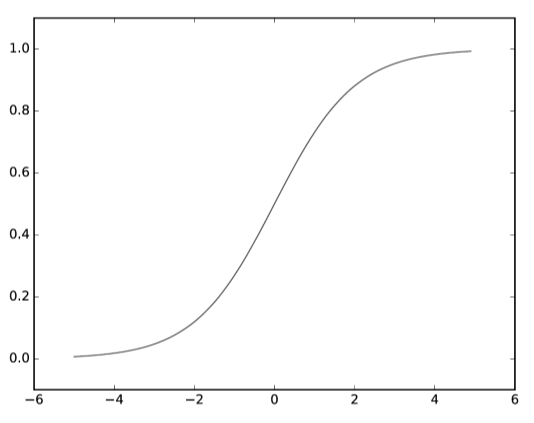

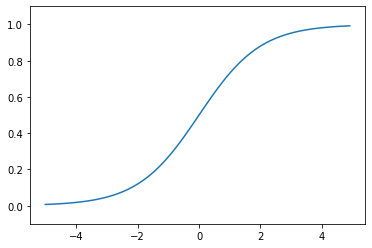

In [44]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x) )

x = np.arange(-5, 5, 0.1)   # -5 부터 5 까지 0.1 간격으로 숫자 출력
y = sigmoid(x)

plt.plot(x,y)
plt.ylim(-0.1, 1.1)
plt.show()

# ■ 시그모이드 함수의 유래


    오즈비율함수 ------------> 로짓함수 ------------> 시그모이드 함수
           ↓                     ↓                           ↓
    실패할 확률 대비           오즈비율 함수에           로짓함수를 신경망에서 p(확률)값을
    성공할 확률을             로그를 사용한 함수         계산하기 편하도록 지수형태로 바꾼 함수
    구하는 함수                          p                                            1
       p                         log (-------)                         h(x) =  ---------------
    -------                            1 - p                                     1 + exp(-x)
     1 - p


## 문제37. 오즈비율 함수 그래프를 그리시오 !

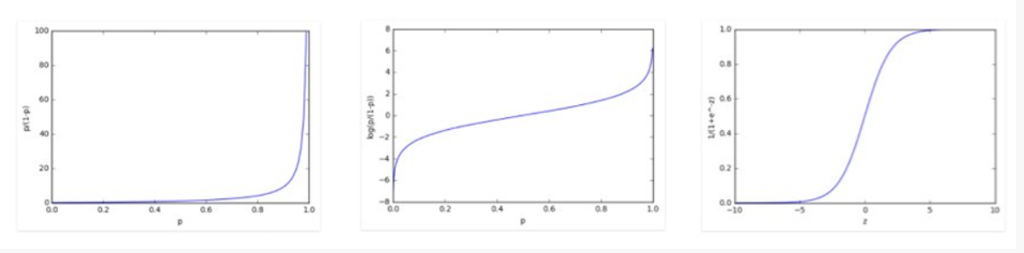


                <오즈비율 함수>                            <로짓 함수>                           <시그모이드 함수>


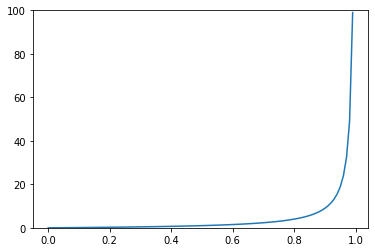

In [45]:
import matplotlib.pyplot as plt
import numpy as np

def odds_ratio(x):
    return x / (1 - x)

x = np.arange(0, 1, 0.01)
y = odds_ratio(x)

plt.plot(x,y)
plt.ylim(0, 100)
plt.show()

## 문제38. 로짓함수 그래프를 시각화하시오 !

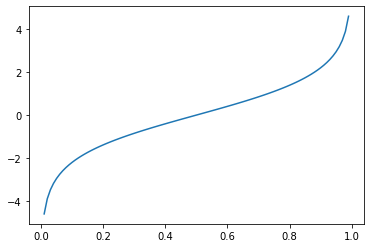

In [46]:
import matplotlib.pyplot as plt
import numpy as np

def logit(x):
    return np.log(x / (1 - x))

x = np.arange(0.01, 1, 0.01)   # -5 부터 5 까지 0.1 간격으로 숫자 출력
y = logit(x)

plt.plot(x,y)
plt.show()